!pip3 install pandas<br>
!pip3 install numpy<br>
!pip3 install matplotlib<br>
!pip3 install statsmodels<br>

In [9]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam

연속형 임의의 데이터 생성

In [10]:
np.random.seed(0)

Temperature = np.random.normal(30,3,1000)
IceAmericano = Temperature + np.random.normal(100,8,1000)
InteriorPrice = np.random.normal(60,20,1000)

데이터 프레임 형태로 2개 데이터 합치기<br>

In [11]:
Data = pd.DataFrame({
    'Temp':Temperature,
    'Sales':IceAmericano,
    'InteriorPrice':InteriorPrice
})

In [12]:
Data.describe()

,Temp,Sales,InteriorPrice
count,1000.000000,1000.000000,1000.000000
mean,29.864230,129.973165,58.975429
std,2.962581,8.208507,19.091885
min,20.861571,105.472846,-2.337132
25%,27.904740,124.141116,45.266707
50%,29.825916,129.810618,58.950044
75%,31.820852,135.284894,72.432322
max,38.278065,155.283252,118.581925


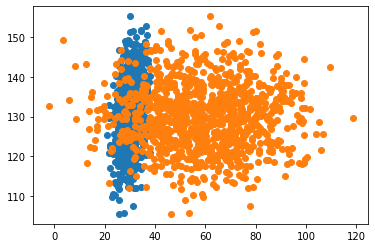

In [13]:
plt.plot(Data['Temp'], Data['Sales'], 'o')
plt.plot(Data['InteriorPrice'], Data['Sales'], 'o')
plt.show()

선형회귀 모델, 딥러닝 framework (keras)로 만들기

In [14]:
Train_x = Data[['Temp', 'InteriorPrice']].iloc[:800,:]
Train_y = Data[['Sales']].iloc[:800]

In [15]:
Valid_x = Data[['Temp', 'InteriorPrice']].iloc[-200:,:]
Valid_y = Data[['Sales']].iloc[-200:]

<br><br><br>
기본 Linear model 구성

In [16]:
model = Sequential()
model.add(Dense(3, activation='linear', input_shape=(2,)))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='linear'))

In [17]:
model.compile(loss='mse',optimizer=Adam(learning_rate=0.1))
hist = model.fit(x=Train_x, y=Train_y, epochs=70)

Epoch 1/70
25/25 [==============================] - 0s 547us/step - loss: 4861.8662
Epoch 2/70
25/25 [==============================] - 0s 457us/step - loss: 474.2820
Epoch 3/70
25/25 [==============================] - 0s 489us/step - loss: 171.8045
Epoch 4/70
25/25 [==============================] - 0s 476us/step - loss: 149.5547
Epoch 5/70
25/25 [==============================] - 0s 551us/step - loss: 147.3694
Epoch 6/70
25/25 [==============================] - 0s 521us/step - loss: 157.8919
Epoch 7/70
25/25 [==============================] - 0s 501us/step - loss: 157.1292
Epoch 8/70
25/25 [==============================] - 0s 478us/step - loss: 157.3787
Epoch 9/70
25/25 [==============================] - 0s 503us/step - loss: 153.1441
Epoch 10/70
25/25 [==============================] - 0s 544us/step - loss: 145.5972
Epoch 11/70
25/25 [==============================] - 0s 492us/step - loss: 145.4856
Epoch 12/70
25/25 [==============================] - 0s 509us/step - loss: 139.0937


In [18]:
model.compile(loss='mse',optimizer=Adam(learning_rate=0.0001))
hist = model.fit(x=Train_x, y=Train_y, epochs=70)

Epoch 1/70
25/25 [==============================] - 0s 499us/step - loss: 63.8540
Epoch 2/70
25/25 [==============================] - 0s 499us/step - loss: 62.7635
Epoch 3/70
25/25 [==============================] - 0s 475us/step - loss: 62.6748
Epoch 4/70
25/25 [==============================] - 0s 488us/step - loss: 62.6764
Epoch 5/70
25/25 [==============================] - 0s 484us/step - loss: 62.6621
Epoch 6/70
25/25 [==============================] - 0s 501us/step - loss: 62.6810
Epoch 7/70
25/25 [==============================] - 0s 498us/step - loss: 62.6083
Epoch 8/70
25/25 [==============================] - 0s 541us/step - loss: 62.6154
Epoch 9/70
25/25 [==============================] - 0s 481us/step - loss: 62.6190
Epoch 10/70
25/25 [==============================] - 0s 527us/step - loss: 62.6017
Epoch 11/70
25/25 [==============================] - 0s 481us/step - loss: 62.6520
Epoch 12/70
25/25 [==============================] - 0s 499us/step - loss: 62.7378
Epoch 13/70
2

In [19]:
Pred = model.predict(Valid_x)
Pred

array([[136.09325 ],
       [134.63826 ],
       [129.15752 ],
       [128.53552 ],
       [133.4878  ],
       [131.85432 ],
       [134.4     ],
       [130.00261 ],
       [123.494705],
       [130.83394 ],
       [128.4492  ],
       [134.00795 ],
       [133.67827 ],
       [127.390945],
       [132.27075 ],
       [136.58446 ],
       [126.826035],
       [136.72028 ],
       [125.89522 ],
       [129.50912 ],
       [129.41006 ],
       [130.11372 ],
       [126.58569 ],
       [126.89194 ],
       [126.48627 ],
       [130.39925 ],
       [130.63904 ],
       [137.9949  ],
       [135.37518 ],
       [129.11592 ],
       [131.17378 ],
       [133.56096 ],
       [130.86781 ],
       [129.61931 ],
       [130.90137 ],
       [132.46008 ],
       [127.66121 ],
       [128.93399 ],
       [131.94202 ],
       [130.3786  ],
       [131.5036  ],
       [127.598465],
       [133.39604 ],
       [139.22571 ],
       [131.12372 ],
       [130.21924 ],
       [132.97127 ],
       [128.3

In [20]:
Pred = [pred[0] for pred in Pred]

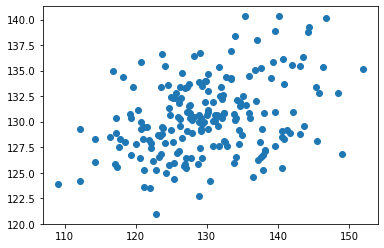

In [22]:
plt.plot(Valid_y['Sales'], Pred, 'o')
plt.show()

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 9         
                                                                 
 dense_1 (Dense)             (None, 10)                40        
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 60
Trainable params: 60
Non-trainable params: 0
_________________________________________________________________


<br><br><br>
모델의 weight, 그리고 상수 확인

In [24]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(2, 3) dtype=float32, numpy=
 array([[ 0.4950212 , -0.39992443, -0.07913401],
        [-0.33616647,  0.12055554, -0.2883588 ]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(3,) dtype=float32, numpy=array([ 10.318776,  -9.966042, -10.703846], dtype=float32)>,
 <tf.Variable 'dense_1/kernel:0' shape=(3, 10) dtype=float32, numpy=
 array([[ 0.34833032,  0.27829745,  0.600049  , -0.41991287, -1.0369344 ,
         -0.14128944, -0.6519352 , -0.70837885, -0.29411238, -0.27863923],
        [ 0.80569595, -0.20838864, -0.9185447 ,  0.44829747,  0.14486681,
          0.24638014,  0.67684686,  0.23407021,  0.39138702,  0.71735597],
        [ 0.91201705, -0.6965314 , -0.7139375 , -0.11556059,  1.1182392 ,
          1.4498324 ,  0.30431718,  0.30956894,  0.5077491 ,  0.57026523]],
       dtype=float32)>,
 <tf.Variable 'dense_1/bias:0' shape=(10,) dtype=float32, numpy=
 array([-0.9667218 , 12.910374  , 12.04683   ,  6.689161  , -0.6061315 ,
        -0.921696

<br><br><br>
모델의 weight, 상수만 출력

In [25]:
for i in range(len(model.weights)):
    if i%2 == 0: print(int(i/2+1), '번째 Layer coefficients')
    if i%2 == 1: print(int(i/2+1), '번째 Layer 상수')
    print(model.weights[i].value().numpy())
    print()

1 번째 Layer coefficients
[[ 0.4950212  -0.39992443 -0.07913401]
 [-0.33616647  0.12055554 -0.2883588 ]]

1 번째 Layer 상수
[ 10.318776  -9.966042 -10.703846]

2 번째 Layer coefficients
[[ 0.34833032  0.27829745  0.600049   -0.41991287 -1.0369344  -0.14128944
  -0.6519352  -0.70837885 -0.29411238 -0.27863923]
 [ 0.80569595 -0.20838864 -0.9185447   0.44829747  0.14486681  0.24638014
   0.67684686  0.23407021  0.39138702  0.71735597]
 [ 0.91201705 -0.6965314  -0.7139375  -0.11556059  1.1182392   1.4498324
   0.30431718  0.30956894  0.5077491   0.57026523]]

2 번째 Layer 상수
[-0.9667218  12.910374   12.04683     6.689161   -0.6061315  -0.92169625
  0.         -0.7579692  -0.9309926  -0.56555206]

3 번째 Layer coefficients
[[ 0.48125523]
 [ 1.0654721 ]
 [ 1.5707185 ]
 [ 0.6106981 ]
 [ 0.41251513]
 [ 0.10569859]
 [-0.16339695]
 [ 0.48270577]
 [ 0.4701742 ]
 [ 0.21143788]]

3 번째 Layer 상수
[8.500883]



# L2 regularizer (Ridge)

In [26]:
model = Sequential()
model.add(Dense(3, activation='linear', input_shape=(2,)))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='linear', kernel_regularizer=tf.keras.regularizers.l2(0.1))) # 람다 : 0.1 : 10%규제
# 0.5면 절반을 없앤다는거?

In [27]:
model.compile(loss='mse',optimizer=Adam(learning_rate=0.1))
hist = model.fit(x=Train_x, y=Train_y, epochs=70)

Epoch 1/70
25/25 [==============================] - 0s 555us/step - loss: 8280.7461
Epoch 2/70
25/25 [==============================] - 0s 539us/step - loss: 275.6392
Epoch 3/70
25/25 [==============================] - 0s 540us/step - loss: 177.1006
Epoch 4/70
25/25 [==============================] - 0s 564us/step - loss: 157.9131
Epoch 5/70
25/25 [==============================] - 0s 505us/step - loss: 153.7104
Epoch 6/70
25/25 [==============================] - 0s 500us/step - loss: 166.1565
Epoch 7/70
25/25 [==============================] - 0s 558us/step - loss: 139.7049
Epoch 8/70
25/25 [==============================] - 0s 486us/step - loss: 133.5374
Epoch 9/70
25/25 [==============================] - 0s 572us/step - loss: 141.7348
Epoch 10/70
25/25 [==============================] - 0s 527us/step - loss: 177.6923
Epoch 11/70
25/25 [==============================] - 0s 654us/step - loss: 143.5614
Epoch 12/70
25/25 [==============================] - 0s 582us/step - loss: 156.0269


In [28]:
model.compile(loss='mse',optimizer=Adam(learning_rate=0.0001))
hist = model.fit(x=Train_x, y=Train_y, epochs=70)

Epoch 1/70
25/25 [==============================] - 0s 610us/step - loss: 64.9793
Epoch 2/70
25/25 [==============================] - 0s 514us/step - loss: 63.1551
Epoch 3/70
25/25 [==============================] - 0s 539us/step - loss: 62.4926
Epoch 4/70
25/25 [==============================] - 0s 550us/step - loss: 62.2580
Epoch 5/70
25/25 [==============================] - 0s 512us/step - loss: 62.2096
Epoch 6/70
25/25 [==============================] - 0s 733us/step - loss: 62.1996
Epoch 7/70
25/25 [==============================] - 0s 565us/step - loss: 62.1966
Epoch 8/70
25/25 [==============================] - 0s 676us/step - loss: 62.1972
Epoch 9/70
25/25 [==============================] - 0s 544us/step - loss: 62.2423
Epoch 10/70
25/25 [==============================] - 0s 483us/step - loss: 62.2072
Epoch 11/70
25/25 [==============================] - 0s 499us/step - loss: 62.1897
Epoch 12/70
25/25 [==============================] - 0s 562us/step - loss: 62.1946
Epoch 13/70
2

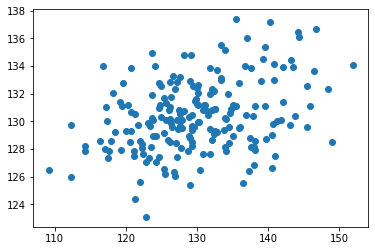

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 3)                 9         
                                                                 
 dense_4 (Dense)             (None, 10)                40        
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 60
Trainable params: 60
Non-trainable params: 0
_________________________________________________________________


In [29]:
Pred = model.predict(Valid_x)
Pred

Pred = [pred[0] for pred in Pred]
plt.plot(Valid_y['Sales'], Pred, 'o')
plt.show()

model.summary()

In [32]:
model.weights

[<tf.Variable 'dense_3/kernel:0' shape=(2, 3) dtype=float32, numpy=
 array([[-0.1430513 , -0.4429806 ,  0.1667821 ],
        [ 0.02833122,  0.0061424 ,  0.01864355]], dtype=float32)>,
 <tf.Variable 'dense_3/bias:0' shape=(3,) dtype=float32, numpy=array([ 2.773196 , -8.158597 , -6.0528955], dtype=float32)>,
 <tf.Variable 'dense_4/kernel:0' shape=(3, 10) dtype=float32, numpy=
 array([[ 0.13842247,  0.23730509,  0.66864175, -0.32118657, -0.90196633,
          0.42919794,  0.6382982 ,  0.03188593,  0.11703859, -0.07363981],
        [ 1.4043632 ,  0.782421  ,  0.48408124,  1.1712265 , -1.3387871 ,
         -0.34164393,  0.68610364,  0.81073445,  0.15671584,  0.53168213],
        [-0.37098145, -0.9038201 , -0.3244477 ,  1.1178913 ,  0.84641224,
         -0.9809207 , -0.6849209 ,  0.13870786,  0.4221319 ,  0.20236617]],
       dtype=float32)>,
 <tf.Variable 'dense_4/bias:0' shape=(10,) dtype=float32, numpy=
 array([-0.780092  , -0.3533948 , -0.93087953, -0.8306918 ,  8.56605   ,
        15.87

In [33]:
for i in range(len(model.weights)):
    if i%2 == 0: print(int(i/2+1), '번째 Layer coefficients')
    if i%2 == 1: print(int(i/2+1), '번째 Layer 상수')
    print(model.weights[i].value().numpy())
    print()

1 번째 Layer coefficients
[[-0.1430513  -0.4429806   0.1667821 ]
 [ 0.02833122  0.0061424   0.01864355]]

1 번째 Layer 상수
[ 2.773196  -8.158597  -6.0528955]

2 번째 Layer coefficients
[[ 0.13842247  0.23730509  0.66864175 -0.32118657 -0.90196633  0.42919794
   0.6382982   0.03188593  0.11703859 -0.07363981]
 [ 1.4043632   0.782421    0.48408124  1.1712265  -1.3387871  -0.34164393
   0.68610364  0.81073445  0.15671584  0.53168213]
 [-0.37098145 -0.9038201  -0.3244477   1.1178913   0.84641224 -0.9809207
  -0.6849209   0.13870786  0.4221319   0.20236617]]

2 번째 Layer 상수
[-0.780092   -0.3533948  -0.93087953 -0.8306918   8.56605    15.878313
 -0.55437684 -0.52570206 16.460321    0.        ]

3 번째 Layer coefficients
[[ 3.19087029e-01]
 [ 1.04817085e-01]
 [ 1.67041913e-01]
 [-4.02040825e-38]
 [ 1.25526023e+00]
 [ 2.05659699e+00]
 [ 2.21650884e-01]
 [ 4.88085642e-34]
 [ 2.34851289e+00]
 [-9.74661600e-37]]

3 번째 Layer 상수
[5.6131506]



# L1 regularizer (Lasso)

In [34]:
model = Sequential()
model.add(Dense(3, activation='linear', input_shape=(2,)))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='linear', kernel_regularizer=tf.keras.regularizers.l1(0.1)))


model.compile(loss='mse',optimizer=Adam(learning_rate=0.1))
hist = model.fit(x=Train_x, y=Train_y, epochs=70)

model.compile(loss='mse',optimizer=Adam(learning_rate=0.0001))
hist = model.fit(x=Train_x, y=Train_y, epochs=70)

Epoch 1/70
25/25 [==============================] - 0s 718us/step - loss: 659.7109
Epoch 2/70
25/25 [==============================] - 0s 499us/step - loss: 178.4831
Epoch 3/70
25/25 [==============================] - 0s 659us/step - loss: 167.2631
Epoch 4/70
25/25 [==============================] - 0s 500us/step - loss: 157.1416
Epoch 5/70
25/25 [==============================] - 0s 579us/step - loss: 158.3089
Epoch 6/70
25/25 [==============================] - 0s 500us/step - loss: 152.8294
Epoch 7/70
25/25 [==============================] - 0s 556us/step - loss: 142.5562
Epoch 8/70
25/25 [==============================] - 0s 605us/step - loss: 159.0896
Epoch 9/70
25/25 [==============================] - 0s 531us/step - loss: 153.2085
Epoch 10/70
25/25 [==============================] - 0s 582us/step - loss: 183.7564
Epoch 11/70
25/25 [==============================] - 0s 497us/step - loss: 155.3220
Epoch 12/70
25/25 [==============================] - 0s 655us/step - loss: 128.9436
E

25/25 [==============================] - 0s 499us/step - loss: 61.6871
Epoch 30/70
25/25 [==============================] - 0s 499us/step - loss: 61.6771
Epoch 31/70
25/25 [==============================] - 0s 613us/step - loss: 61.6668
Epoch 32/70
25/25 [==============================] - 0s 505us/step - loss: 61.6673
Epoch 33/70
25/25 [==============================] - 0s 556us/step - loss: 61.7224
Epoch 34/70
25/25 [==============================] - 0s 540us/step - loss: 61.6612
Epoch 35/70
25/25 [==============================] - 0s 540us/step - loss: 61.6760
Epoch 36/70
25/25 [==============================] - 0s 499us/step - loss: 61.6809
Epoch 37/70
25/25 [==============================] - 0s 528us/step - loss: 61.6845
Epoch 38/70
25/25 [==============================] - 0s 499us/step - loss: 61.7031
Epoch 39/70
25/25 [==============================] - 0s 540us/step - loss: 61.6721
Epoch 40/70
25/25 [==============================] - 0s 703us/step - loss: 61.6639
Epoch 41/70
25/2

In [35]:
for i in range(len(model.weights)):
    if i%2 == 0: print(int(i/2+1), '번째 Layer coefficients')
    if i%2 == 1: print(int(i/2+1), '번째 Layer 상수')
    print(model.weights[i].value().numpy())
    print()

1 번째 Layer coefficients
[[-0.5054643   0.17662029  0.17451704]
 [ 0.00648384  0.01168943  0.0329693 ]]

1 번째 Layer 상수
[-9.882243  -6.0238695 -7.2420664]

2 번째 Layer coefficients
[[-3.6763427e-01  5.2034271e-01  3.8833785e-01  5.1765168e-01
  -4.8878637e-01  2.3368695e-01  6.2802076e-01  1.4639131e+00
  -2.4365771e-01  2.0501298e-01]
 [ 4.1124880e-02 -3.6175737e-01  2.8333300e-01 -6.6592097e-03
  -4.1901028e-01  9.4110477e-01  1.5729117e-01 -4.1905785e-01
  -2.4656239e-01 -1.2706757e-01]
 [-6.6694731e-01 -4.0314078e-02 -5.3949833e-01  5.6686425e-01
   1.5978571e-02  7.8230238e-01  1.6926461e-01 -2.3644604e-01
   4.1580480e-01  8.8906288e-04]]

2 번째 Layer 상수
[13.6510935  0.         0.         0.        13.23614   12.449517
  0.        -1.3020782 13.482466   0.       ]

3 번째 Layer coefficients
[[ 2.0036244e+00]
 [ 1.4234929e-05]
 [ 3.1121417e-06]
 [-3.2953694e-06]
 [ 1.6423652e+00]
 [ 1.1114146e+00]
 [ 1.6244167e-07]
 [-2.5537051e-05]
 [ 1.2140476e+00]
 [-1.7908338e-05]]

3 번째 Layer 상수
[1